<a href="https://colab.research.google.com/github/kaiting0514/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [5]:
x_train[9487].shape

(28, 28, 1)

In [6]:
X = x_train[9487][:,:,0]

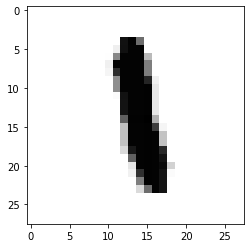

In [7]:
plt.imshow(X, cmap='Greys')

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [19]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.05), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [22]:
model.fit(x_train, y_train, batch_size=100, epochs=12)

Epoch 1/12
600/600 [==============================] - 13s 4ms/step - loss: 0.0898 - accuracy: 0.1502
Epoch 2/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0889 - accuracy: 0.3548
Epoch 3/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0866 - accuracy: 0.3899
Epoch 4/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0671 - accuracy: 0.5538
Epoch 5/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0260 - accuracy: 0.8527
Epoch 6/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0157 - accuracy: 0.9040
Epoch 7/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0122 - accuracy: 0.9247
Epoch 8/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0101 - accuracy: 0.9379
Epoch 9/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0088 - accuracy: 0.9451
Epoch 10/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0078 - accuracy: 0.951

In [23]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.9662


In [24]:
print('測試資料 loss: ', score[0])
print('測試資料正確率: ', score[1])

測試資料 loss:  0.005606850143522024
測試資料正確率:  0.9661999940872192


In [25]:
model_json = model.to_json()
open('handwriting_model_cnn.json', 'w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

In [26]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


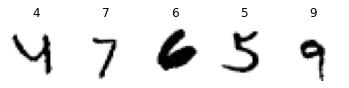

In [27]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(y_predict[pick[i]])
    plt.axis("off")